<a href="https://colab.research.google.com/github/amlannag6/ML-Model-Prediction-of-Diamonds-Price/blob/main/Diamond_Price_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Prediction of Diamond Price

In [ ]:
# Title: Machine Learning Project 
# File: Diamond_Price_Prediction_ML.py
# Author: Amlan Nag 
# Version 1.0 

In [ ]:
# Packages importing for implement graph, virtulization, regression techniques implement, classifier and testing,training packages. 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
import pandas.util.testing as tm
import torch
#import jovian
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas.util.testing as tm

In [ ]:
# Calling and reading the dataset File. 

In [5]:
data = pd.read_csv(r"https://raw.githubusercontent.com/amlannag6/ML-Model-Prediction-of-Diamonds-Price/main/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Dropping unnamed coloum as there is no need of it. 

In [6]:
data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#calling the datset and review it 

In [ ]:
data.shape
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#The function data.isnull().sum() returns the number of missing values in the data set. Data cleaning 

In [ ]:
data.isnull().sum() 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# Diplayed the data set value . 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
# Initialing x,y,z level to values to calculate actual value. 

In [ ]:
temp = data[['x','y','z']].replace(0,np.NaN)
temp.isnull().sum()

x     8
y     7
z    20
dtype: int64

In [ ]:
#Indexing and Selecting Data 

In [ ]:
data = data.loc[(data[['x','y','z']]!=0).all(axis=1)]
data.shape

(53920, 10)

In [ ]:
# Data Representation 

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# Function implemnet of graph ratio as per each level 

c:\users\amlan\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


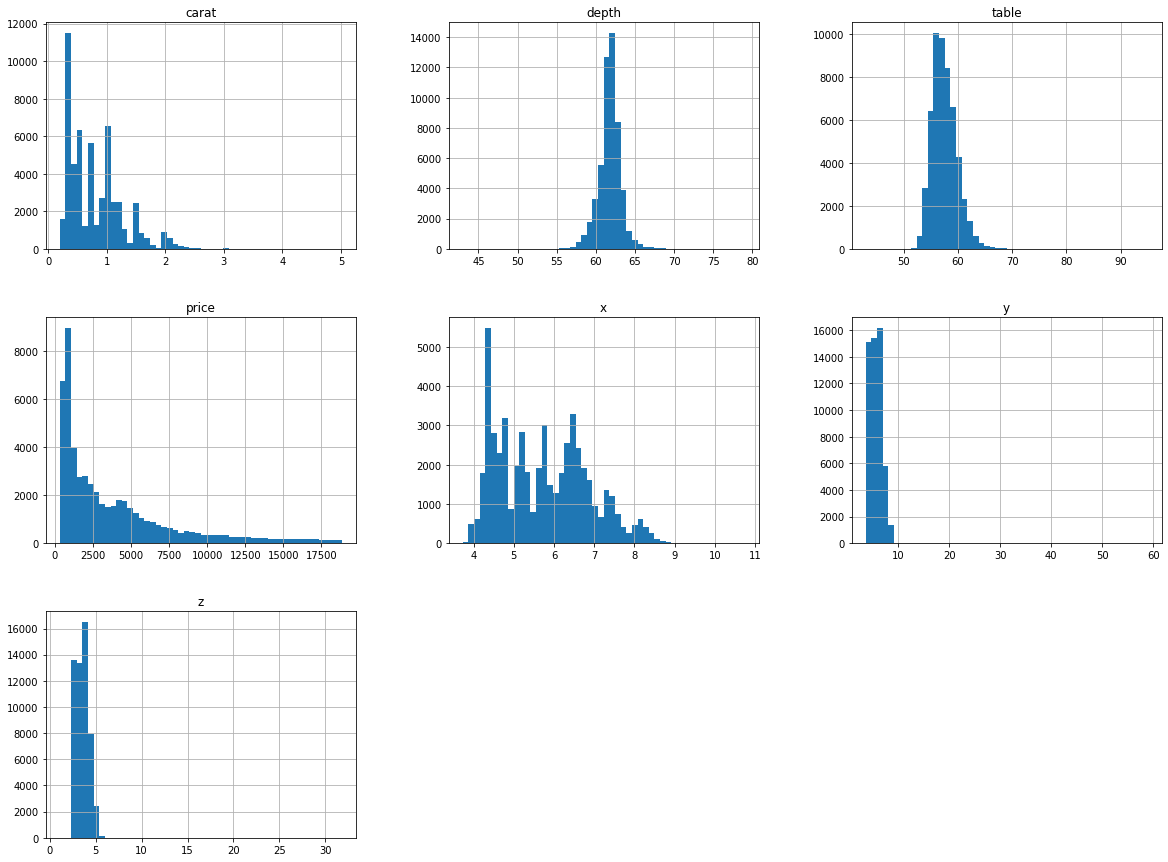

In [ ]:
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()


In [ ]:
                                                                                                                                                    #(Sindiri, 2020)

In [ ]:
#Implemnet of seaborn.pairplot which is Visualizing Data with Pairs Plots

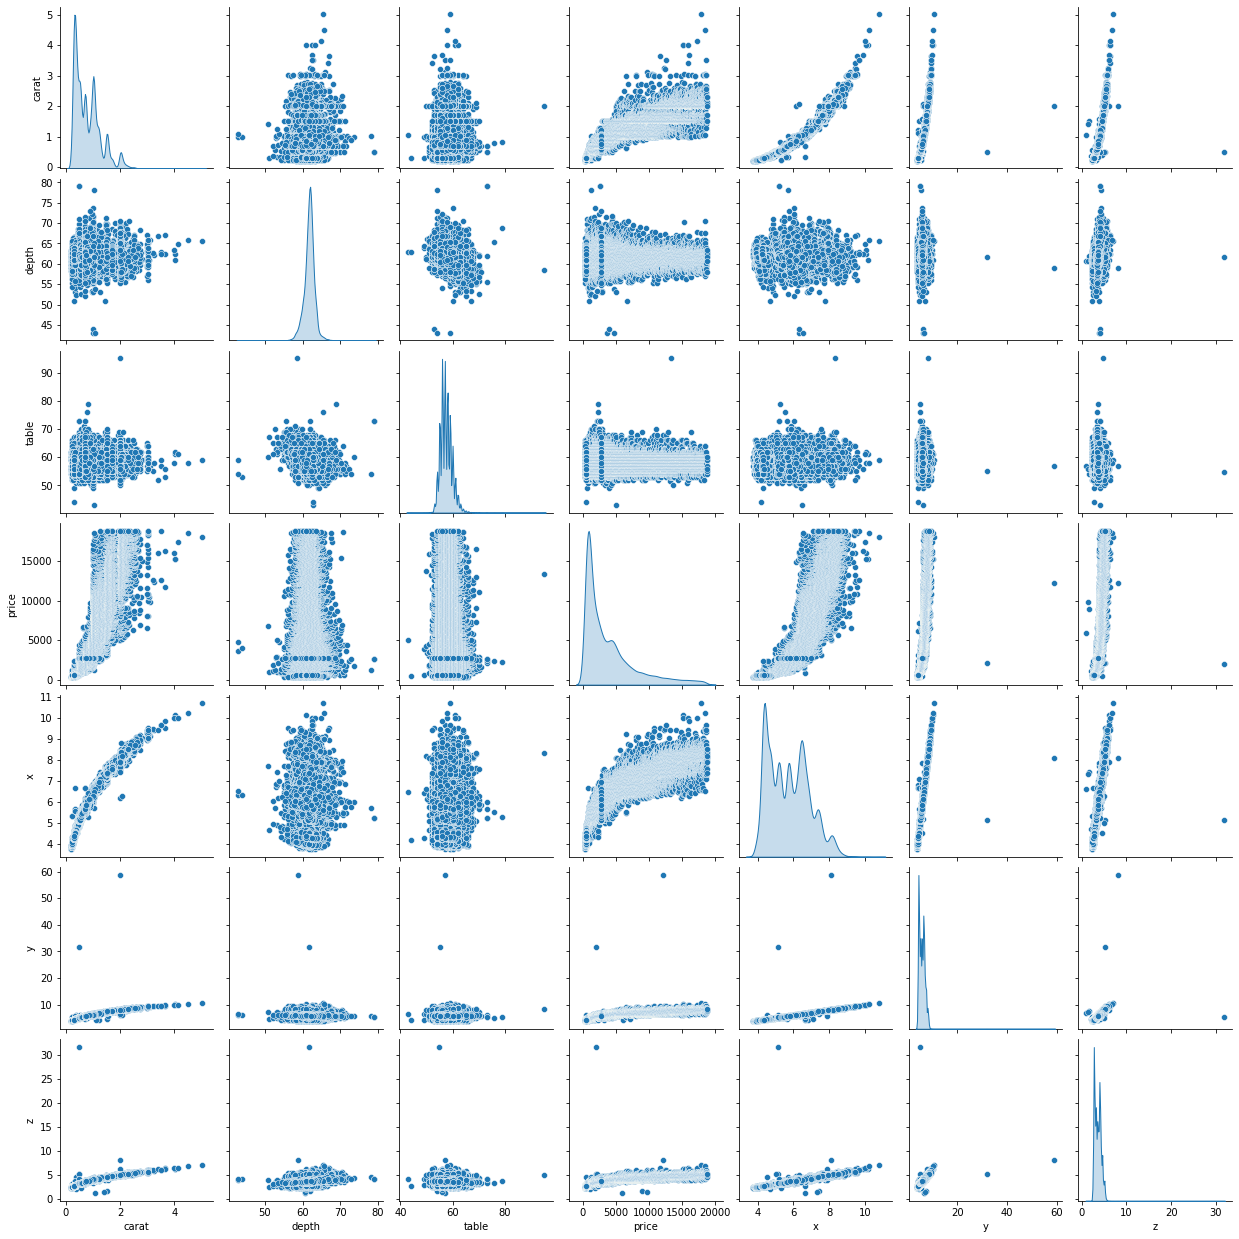

In [ ]:
sns.pairplot(data , diag_kind = 'kde');

In [ ]:
                                                                                                                                                           #(Sindiri, 2020)

In [ ]:
#Heat maps display numeric tabular data with coloured cells dependent on the value contained. Heat maps are excellent for highlighting patterns in this type of data, particularly when the data is organised and clustered.

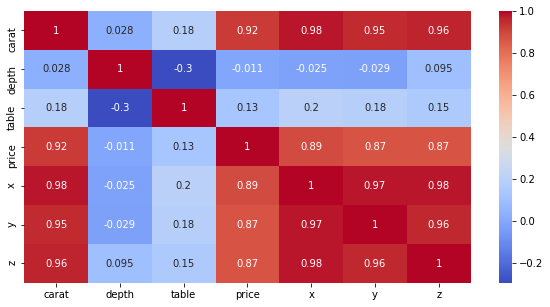

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(),annot = True , cmap = 'coolwarm' );

In [ ]:
                                                            #(Sindiri, 2020)

In [ ]:
#Implemnetation of Correlation Matrix 

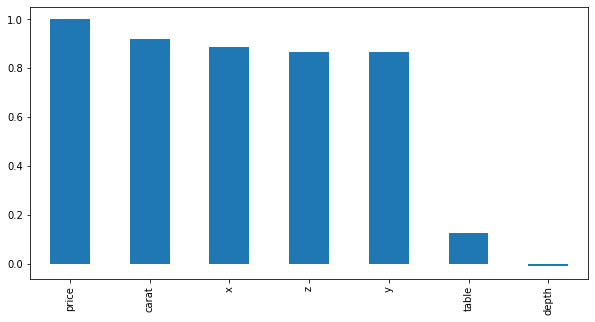

In [ ]:
corr_mat = data.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

In [ ]:
#Check which columns in DataFrame are Categorical and implement function Graph bar 

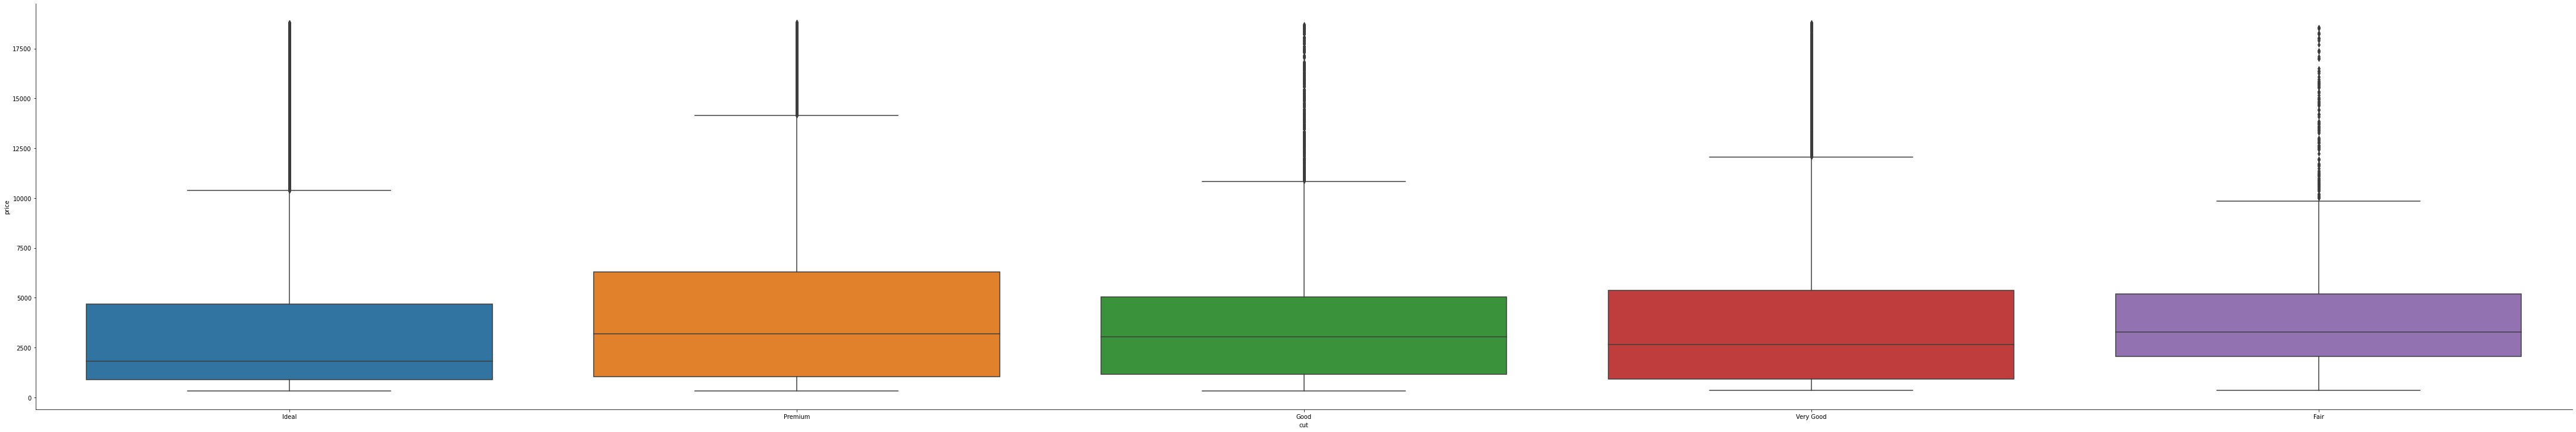

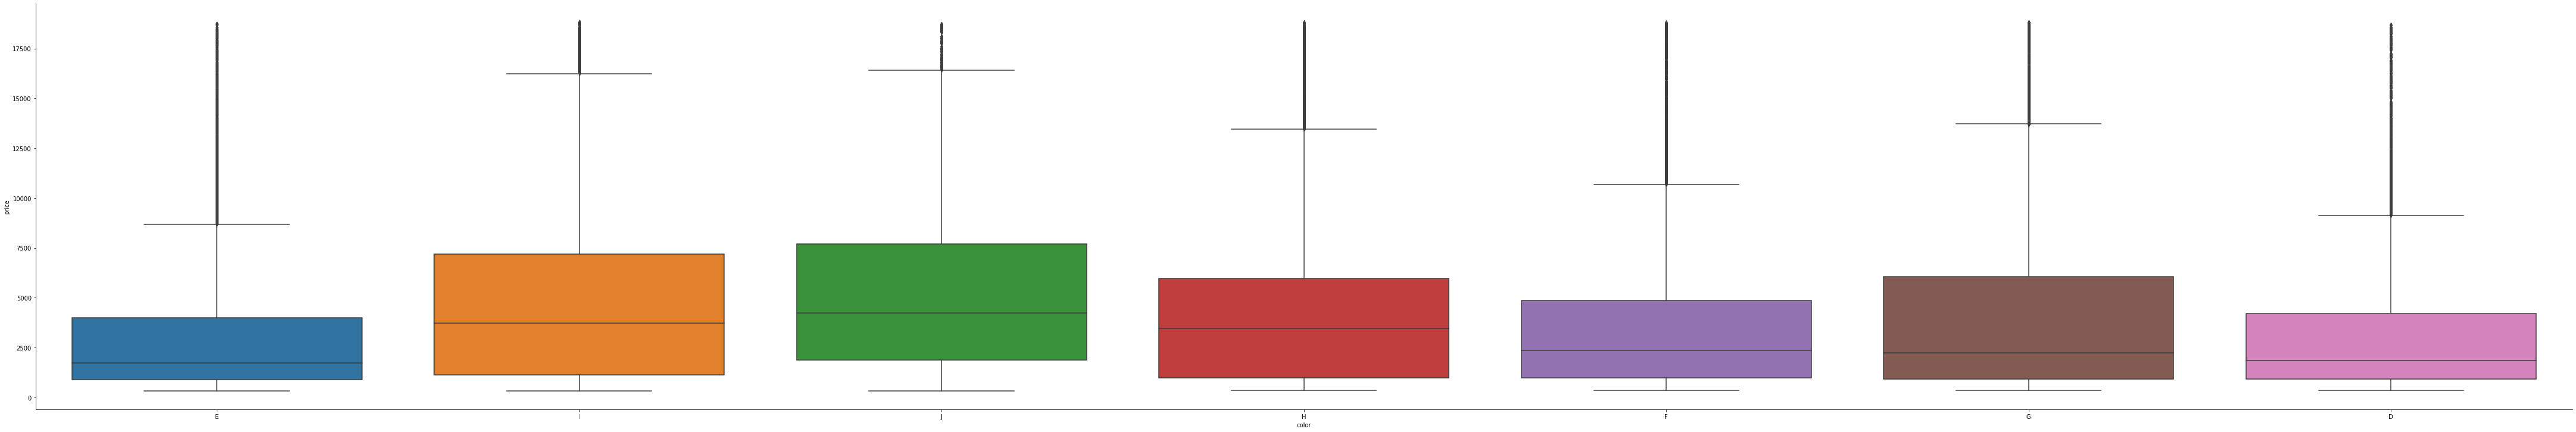

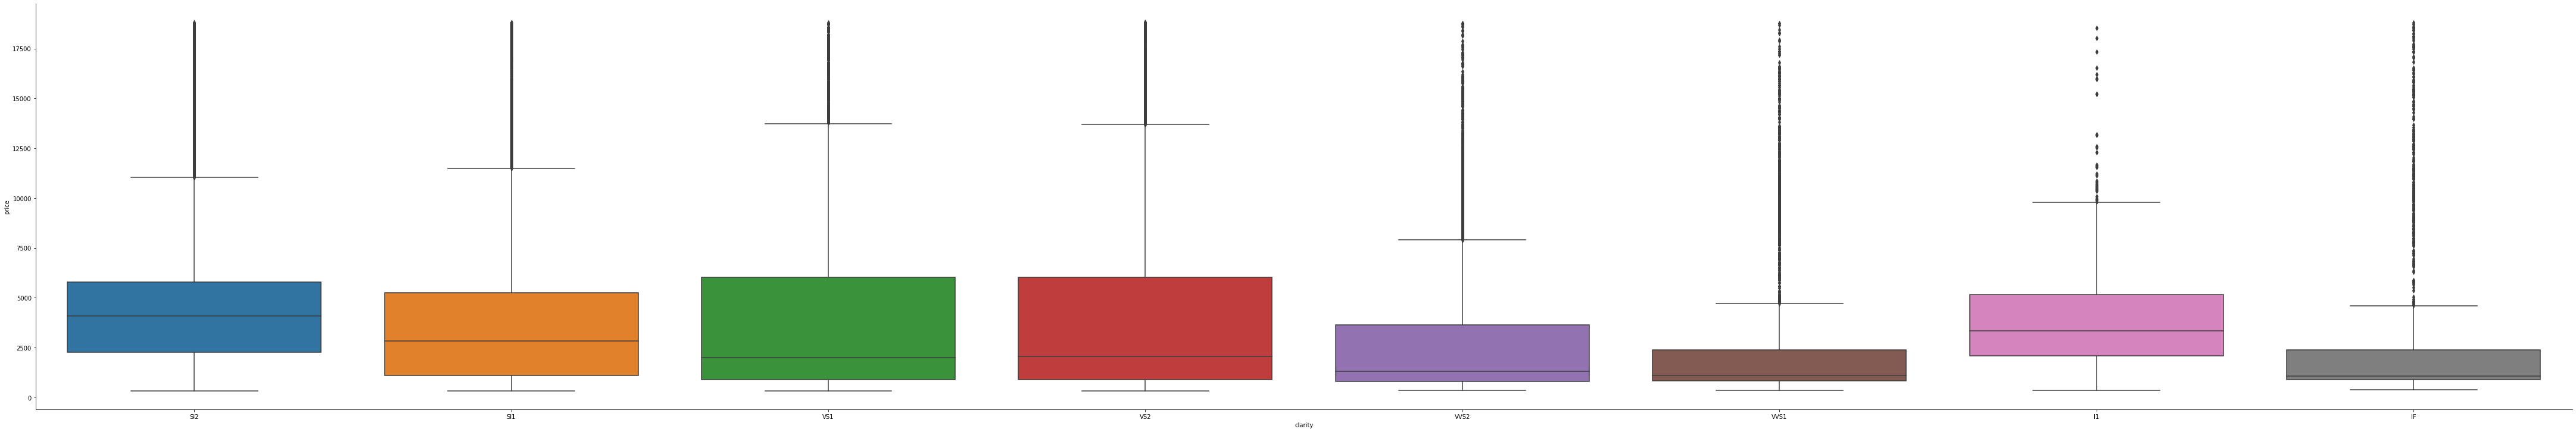

In [ ]:
input_cat_columns = data.select_dtypes(include = ['object']).columns.tolist()

for col in input_cat_columns:
    sns.catplot(x=col, y="price",
            kind="box", dodge=False, height = 10, aspect = 6,data=data);

In [ ]:
                                                                                                                                                                    #(Sindiri, 2020)

In [ ]:
#One Hot Encoding is a data processing method that converts categorical data into a binary vector representation for use in machine learning algorithms. One-Hot Encoding and Dummy Variable Encoding varrient implement 

In [ ]:
data_one_hot_encoding = pd.get_dummies(data)
data_one_hot_encoding.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
data_one_hot_encoding.columns.values

array(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype=object)

In [ ]:
# Data Cleanning - Drooping Data before Training Process 

In [ ]:
data=data.drop(['depth','table','x','y','z'],axis=1)

In [ ]:
data.head()

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326
1,0.21,Premium,E,SI1,326
2,0.23,Good,E,VS1,327
3,0.29,Premium,I,VS2,334
4,0.31,Good,J,SI2,335


In [ ]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
price        int64
dtype: object

In [ ]:
# Attribute type changing 

In [ ]:
data['price']=data.price.astype(float)
data.dtypes

carat      float64
cut         object
color       object
clarity     object
price      float64
dtype: object

In [ ]:
#Data Visualizarion after Data cleaning and shorting - This function will represent Allotmnet of Diamond Weight value as per carat and allomenet of diamond price. 

Text(0.5, 1.0, ' Allotment of Diamond Price')

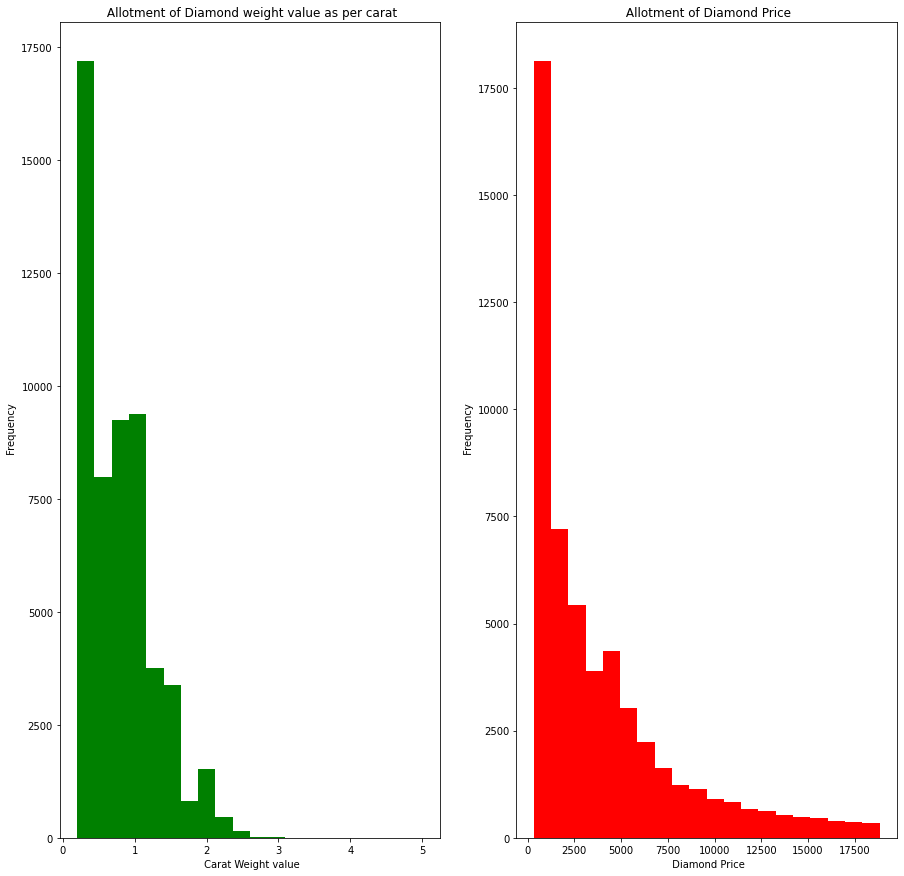

In [ ]:
plt.figure(figsize=[15,15])
plt.subplot(121)
plt.hist(data['carat'],bins=20,color='g')
plt.xlabel(" Carat Weight value")
plt.ylabel(" Frequency")
plt.title(" Allotment of Diamond weight value as per carat")

plt.subplot(122)
plt.hist(data['price'],bins=20,color='r')
plt.xlabel(" Diamond Price")
plt.ylabel(" Frequency")
plt.title(" Allotment of Diamond Price")

In [ ]:
#Reviewing first two data set value. 

In [ ]:
data.head(2)

,carat,cut,color,clarity,price
0,0.23,Ideal,E,SI2,326.0
1,0.21,Premium,E,SI1,326.0


In [ ]:
# Label Encoder converting catergorical data into numberic form. Transforming the prediction target (y). This transformer should be used to encode target values.

In [ ]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
label=l1.fit_transform(data['cut'])
l1.classes_

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [ ]:
# Labelizing data to values 

In [ ]:
data['cut_label']=label

In [ ]:
# Now representation data and justified the assigned valued displayed the tabel with number. 

In [ ]:
data.head()

,carat,cut,color,clarity,price,cut_label
0,0.23,Ideal,E,SI2,326.0,2
1,0.21,Premium,E,SI1,326.0,3
2,0.23,Good,E,VS1,327.0,1
3,0.29,Premium,I,VS2,334.0,3
4,0.31,Good,J,SI2,335.0,1


In [ ]:
# Same Labelizing and initiating number to level as per desciption 

In [ ]:
l2=LabelEncoder()
label1=l2.fit_transform(data['clarity'])
data['clarity_label']=label1
data.head()

,carat,cut,color,clarity,price,cut_label,clarity_label
0,0.23,Ideal,E,SI2,326.0,2,3
1,0.21,Premium,E,SI1,326.0,3,2
2,0.23,Good,E,VS1,327.0,1,4
3,0.29,Premium,I,VS2,334.0,3,5
4,0.31,Good,J,SI2,335.0,1,3


In [ ]:
# Same Labelizing and initiating number to level as per desciption - for color 

In [ ]:
data['color']=data['color'].map({'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7, 'NA':8,})

In [ ]:
data['color'].fillna(0)

0        2
1        2
2        2
3        6
4        7
        ..
53935    1
53936    1
53937    1
53938    5
53939    1
Name: color, Length: 53920, dtype: int64

In [ ]:
#The function isnull().sum() returns the number of missing values in the data set. Data cleaning 

In [ ]:
data['color'].isnull().sum()

0

In [ ]:
data.head()

,carat,cut,color,clarity,price,cut_label,clarity_label
0,0.23,Ideal,2,SI2,326.0,2,3
1,0.21,Premium,2,SI1,326.0,3,2
2,0.23,Good,2,VS1,327.0,1,4
3,0.29,Premium,6,VS2,334.0,3,5
4,0.31,Good,7,SI2,335.0,1,3


In [ ]:
# data set price value described to review as float and represntation. 

In [ ]:
y=data['price']
y.head()

0    326.0
1    326.0
2    327.0
3    334.0
4    335.0
Name: price, dtype: float64

In [ ]:
# After new leveling with values- drop previous data with int value and other level marks like color or clarity. 

In [ ]:
x=data.drop(['price','cut',"clarity"],axis=1)
x.head()

,carat,color,cut_label,clarity_label
0,0.23,2,2,3
1,0.21,2,3,2
2,0.23,2,1,4
3,0.29,6,3,5
4,0.31,7,1,3


In [ ]:
#Training Dataset Progression 

In [ ]:
#implemented the train test split and randomized values and defined train size value and declared random state.After that identify the train value, test value and data values which indicates the total number of types values.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [ ]:
len(x_train)

43136

In [ ]:
len(y_test)

10784

In [ ]:
len(data)

53920

In [ ]:
# Displaying Data Value

In [ ]:
data.head()

,carat,cut,color,clarity,price,cut_label,clarity_label
0,0.23,Ideal,2,SI2,326.0,2,3
1,0.21,Premium,2,SI1,326.0,3,2
2,0.23,Good,2,VS1,327.0,1,4
3,0.29,Premium,6,VS2,334.0,3,5
4,0.31,Good,7,SI2,335.0,1,3


In [ ]:
data.tail()   #Data set end values 

,carat,cut,color,clarity,price,cut_label,clarity_label
53935,0.72,Ideal,1,SI1,2757.0,2,2
53936,0.72,Good,1,SI1,2757.0,1,2
53937,0.70,Very Good,1,SI1,2757.0,4,2
53938,0.86,Premium,5,SI2,2757.0,3,3
53939,0.75,Ideal,1,SI2,2757.0,2,3


In [ ]:
# Implement of standaredScaler Method
#Centering and scaling are performed separately on each element by calculating the necessary statistics on the training set samples. The mean and standard deviation are then saved for later use with transform on other results.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
## Classifer Implementaion 

In [ ]:
# DecisionTreeClassifier Use to check accruracy as for prediction of the validation. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
acc=DecisionTreeClassifier()
acc.fit(x_train,y_train)
pred1=acc.predict(x_test)

In [ ]:
# Accuracy score check for the classifier. 

In [ ]:
from sklearn.metrics import accuracy_score
a_decision=accuracy_score(y_test,pred1)*100
print(a_decision)

13.325296735905045


In [ ]:
## Regressions Implementaion

In [ ]:
# Implement of Linear Regression Algorithm 

In [ ]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)
pred2=linreg.predict(x_test)

In [ ]:
# R2_score check for the Linear Regression Algorithm 

In [ ]:
from sklearn.metrics import r2_score
rc_linear=r2_score(y_test,pred2)*100
print(rc_linear)

88.3187096886613


In [ ]:
# Implement of Decision tree Regressor Algorithm  

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(x_train,y_train)
pred3=reg.predict(x_test)

In [ ]:
# R2_score check for the Decision tree Regressor Algorithm  

In [ ]:
from sklearn.metrics import r2_score
rc_decision=r2_score(y_test,pred3)*100
print(rc_decision)

97.27111679794655


In [ ]:
# Implement of Lasso Algorithm  

In [ ]:
from sklearn.linear_model import Lasso
lassoreg=Lasso()
lassoreg.fit(x_train,y_train)
pred4=lassoreg.predict(x_test)

In [ ]:
# R2_score check for Lasso Algorithm  

In [ ]:
rclasso=r2_score(y_test,pred4)*100
print(rclasso)

88.31871809563101


In [ ]:
# Implement of RandomForest Regressor Algorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
pred5=rf.predict(x_test)

In [ ]:
# R2_score check for RandomForest Regressor Algorithm

In [ ]:
from sklearn.metrics import r2_score
rcrf=r2_score(y_test,pred5)*100
print(rcrf)

97.90547251881942


In [ ]:
# Report of Classifer and Regression algorithm using Accuracy and R2_score:

In [ ]:
print("Accuracy Test :",a_decision)
print("LinearRegression:",rc_linear)
print("DecisionTreeRegressor:",rc_decision)
print("Lasso:",rclasso )
print("RandomForestRegressor:",rcrf )

Accuracy Test : 13.325296735905045
LinearRegression: 88.3187096886613
DecisionTreeRegressor: 97.27111679794655
Lasso: 88.31871809563101
RandomForestRegressor: 97.90547251881942


In [ ]:
# Define a function to call the prediction and implement the learning of the agent 
# Input functions will take input of carat,cut,clarity and color value from user and accordingly using RandomForest Regressor Algorithm regression, would show the value as because it is the most accuarte value. 

In [ ]:
def prediction():
    carat=(input("Enter the value for carat:"))
    cut=(input("Enter the value for cut:"))
    clarity=(input("Enter the value for clarity:"))
    color=(input("Enter the value for color:"))
    
    
    price=rf.predict([[carat,cut,clarity,color]])[0]*0.1
    print("Aprox  price value of Diamond Is : ",price , 'USD')
    
    
predi=prediction()
predi
   

In [ ]:
def prediction():
    carat=(input("Enter the value for carat:"))
    cut=(input("Enter the value for cut:"))
    clarity=(input("Enter the value for clarity:"))
    color=(input("Enter the value for color:"))
    
    
    price=reg.predict([[carat,cut,clarity,color]])[0]*0.1
    print("Aprox price value of Diamond Is : ", price , 'USD')
    
    
predi=prediction()
predi

Enter the value for carat:0.23
Enter the value for cut:2
Enter the value for clarity:2
Enter the value for color:2


NameError: ignored

In [ ]:
#Refrences : 
# 1. V. Sindiri, “Diamond price prediction based on their cut, colour, clarity, price with PyTorch,” Medium, 16-Jun-2020. [Online]. Available: https://towardsdatascience.com/diamond-price-prediction-based-on-their-cut-colour-clarity-price-with-pytorch-1e0353d2503b. [Accessed: 04-Apr-2021].  

In [ ]:
#End of program !! 